# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [936]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [937]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN,Dropout
from tensorflow.keras.models import Sequential
tf.random.set_seed(42)

In [938]:
df = pd.read_csv("Traffic Data.csv")
df["date_time"]= pd.to_datetime(df["date_time"])
df = df.set_index(df["date_time"])
df= df.sort_index()
df["Hours"] = df["date_time"].dt.hour
df["Month"] = df["date_time"].dt.month
df = df.drop(["date_time"], axis=1)
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,11
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,19,9
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,20,9
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,21,9


In [940]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,11


In [941]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,,
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,19,9
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,20,9
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,21,9
2018-09-30 22:00:00,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,22,9
2018-09-30 23:00:00,954.0,282.12,0.0,0.0,90,Clouds,overcast clouds,23,9


In [942]:
df.sample(7)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,,
2017-08-14 02:00:00,277.0,290.02,0.0,0.0,90,Mist,mist,2,8
2018-01-25 09:00:00,5177.0,269.35,0.0,0.0,90,Fog,fog,9,1
2017-03-05 10:00:00,3654.0,280.02,0.0,0.0,90,Clouds,overcast clouds,10,3
2018-06-25 10:00:00,4310.0,295.37,0.0,0.0,75,Rain,light rain,10,6
2018-08-14 09:00:00,4766.0,297.48,0.0,0.0,75,Clouds,broken clouds,9,8
2017-11-16 02:00:00,264.0,270.86,0.0,0.0,90,Clouds,overcast clouds,2,11
2017-08-07 04:00:00,879.0,286.08,0.0,0.0,1,Mist,mist,4,8


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   Hours                20000 non-null  int32  
 8   Month                20000 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 1.4+ MB


In [944]:
df = df.dropna()

In [945]:
df.duplicated().sum()
df.drop_duplicates()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,11
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,11
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,19,9
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,20,9
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,21,9


In [946]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'Hours', 'Month'],
      dtype='object')

In [947]:
df["snow_1h"].value_counts()

snow_1h
0.0    19980
Name: count, dtype: int64

In [948]:
df = df.drop("snow_1h",axis=1)
df

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Snow,heavy snow,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Fog,fog,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Mist,mist,15,11
2016-11-18 16:00:00,5074.0,273.84,0.0,90,Fog,fog,16,11
2016-11-18 16:00:00,5074.0,273.84,0.0,90,Mist,mist,16,11
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,75,Clouds,broken clouds,19,9
2018-09-30 20:00:00,2781.0,282.76,0.0,90,Clouds,overcast clouds,20,9
2018-09-30 21:00:00,2159.0,282.73,0.0,90,Thunderstorm,proximity thunderstorm,21,9


In [949]:
df["weather_description"].value_counts()  

weather_description
sky is clear                           5506
mist                                   2756
overcast clouds                        1737
broken clouds                          1574
scattered clouds                       1457
light snow                             1247
light rain                             1198
moderate rain                           747
haze                                    672
light intensity drizzle                 605
fog                                     478
few clouds                              463
proximity thunderstorm                  365
drizzle                                 346
heavy intensity rain                    184
snow                                    160
proximity shower rain                   105
Sky is Clear                            100
thunderstorm                             68
heavy snow                               38
heavy intensity drizzle                  34
proximity thunderstorm with rain         33
thunderstorm

In [950]:
df.isna().sum()

traffic_volume         0
temp                   0
rain_1h                0
clouds_all             0
weather_main           0
weather_description    0
Hours                  0
Month                  0
dtype: int64

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [951]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["weather_description"] = encoder.fit_transform(df["weather_description"])
df["weather_main"] = encoder.fit_transform(df["weather_main"])
df

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,Hours,Month
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,8,9,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,90,3,4,15,11
2016-11-18 15:00:00,4872.0,274.08,0.0,90,5,16,15,11
2016-11-18 16:00:00,5074.0,273.84,0.0,90,3,4,16,11
2016-11-18 16:00:00,5074.0,273.84,0.0,90,5,16,16,11
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,75,1,1,19,9
2018-09-30 20:00:00,2781.0,282.76,0.0,90,1,18,20,9
2018-09-30 21:00:00,2159.0,282.73,0.0,90,9,20,21,9


In [952]:
df["weather_main"].sample(5)

date_time
2018-04-06 06:00:00    8
2017-09-09 07:00:00    1
2017-10-29 13:00:00    1
2017-04-03 15:00:00    2
2018-01-22 18:00:00    3
Name: weather_main, dtype: int32

In [953]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'clouds_all', 'weather_main',
       'weather_description', 'Hours', 'Month'],
      dtype='object')

<Axes: >

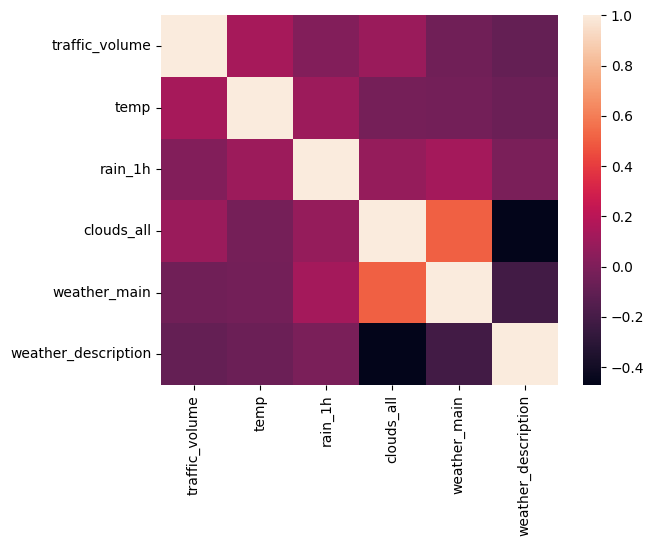

In [954]:
df1 = df[['traffic_volume', 'temp', 'rain_1h', 'clouds_all', 'weather_main',
       'weather_description']].corr()
sns.heatmap(df1)

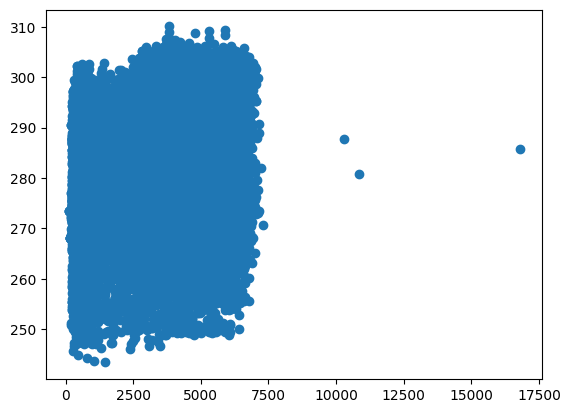

In [955]:
plt.scatter(data= df , x= "traffic_volume", y="temp")

{'whiskers': [<matplotlib.lines.Line2D at 0x15c677f3d10>,
 'caps': [<matplotlib.lines.Line2D at 0x15c67860d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c678571d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15c67861d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c67862450>],
 'means': []}

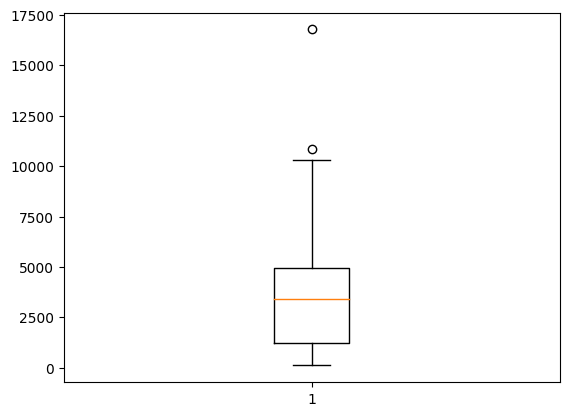

In [956]:
plt.boxplot(df["traffic_volume"])

In [957]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19980 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 19980 non-null  float64
 2   rain_1h              19980 non-null  float64
 3   clouds_all           19980 non-null  int64  
 4   weather_main         19980 non-null  int32  
 5   weather_description  19980 non-null  int32  
 6   Hours                19980 non-null  int32  
 7   Month                19980 non-null  int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 1.1 MB


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [958]:
cols = ['traffic_volume', 'temp', 'rain_1h', 'clouds_all', 'weather_main',
       'weather_description',"Hours","Month"]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19265 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19265 non-null  float64
 1   temp                 19265 non-null  float64
 2   rain_1h              19265 non-null  float64
 3   clouds_all           19265 non-null  int64  
 4   weather_main         19265 non-null  int32  
 5   weather_description  19265 non-null  int32  
 6   Hours                19265 non-null  int32  
 7   Month                19265 non-null  int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 1.0 MB


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [959]:
df["prev_traffic_volume"] = df["traffic_volume"].shift(-1)
df["Diffrance_between_traffic_volume"] = df["prev_traffic_volume"] - df["traffic_volume"]
df = df.dropna()


### I already extracted hours and months in the first cell before i trun the "date_time" to an index. 

C:\Users\Hamad\AppData\Local\Temp\ipykernel_17084\2350130836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prev_traffic_volume"] = df["traffic_volume"].shift(-1)
C:\Users\Hamad\AppData\Local\Temp\ipykernel_17084\2350130836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diffrance_between_traffic_volume"] = df["prev_traffic_volume"] - df["traffic_volume"]


In [960]:
df

,traffic_volume,temp,rain_1h,clouds_all,weather_main,weather_description,Hours,Month,prev_traffic_volume,Diffrance_between_traffic_volume
date_time,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,8,9,15,11,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,90,3,4,15,11,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,90,5,16,15,11,5074.0,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,90,3,4,16,11,5074.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,90,5,16,16,11,5074.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 17:00:00,4132.0,284.79,0.0,75,1,1,17,9,3543.0,-589.0
2018-09-30 19:00:00,3543.0,283.45,0.0,75,1,1,19,9,2781.0,-762.0
2018-09-30 20:00:00,2781.0,282.76,0.0,90,1,18,20,9,2159.0,-622.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [961]:
X = df.drop("traffic_volume",axis=1)
train_val , val = train_test_split(X,test_size=0.13,shuffle=False,random_state=42)
train , test = train_test_split(train_val,test_size=0.15, shuffle=False,random_state=42)

print(train.shape,val.shape,test.shape)

(14245, 9) (2505, 9) (2514, 9)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [962]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
val = scaler.fit_transform(val)
test = scaler.fit_transform(test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [963]:
from tensorflow.keras.utils import timeseries_dataset_from_array

win = 30 

train_x = timeseries_dataset_from_array(train,targets= train[win:,0], sequence_length = win)
val_x = timeseries_dataset_from_array(val,targets= val[win:,0], sequence_length = win)
test_x= timeseries_dataset_from_array(test,targets= test[win:,0], sequence_length = win)

In [964]:
from tensorflow.keras.callbacks import EarlyStopping
model_RNN = Sequential([
    SimpleRNN(10,activation="tanh",input_shape= (win,train.shape[-1])),
    #SimpleRNN(10,activation="tanh"),
    Dense(1, activation="relu")
])
model_RNN.compile(optimizer = "adam",loss="mse", metrics=["mae"])

erly = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    restore_best_weights = True
)

c:\Users\Hamad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [965]:
history = model_RNN.fit(train_x, validation_data=val_x, epochs=15,batch_size=50, callbacks=erly)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0706 - mae: 0.2152 - val_loss: 0.0869 - val_mae: 0.2423
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0297 - mae: 0.1370 - val_loss: 0.0729 - val_mae: 0.2276
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0198 - mae: 0.1130 - val_loss: 0.0710 - val_mae: 0.2315
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0167 - mae: 0.1052 - val_loss: 0.0696 - val_mae: 0.2346
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0159 - mae: 0.1030 - val_loss: 0.0663 - val_mae: 0.2322
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mae: 0.1027 - val_loss: 0.0631 - val_mae: 0.2284
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0157 - mae: 0.1026 - val_loss: 0.0601 - val_mae: 0.2242
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0156 - mae: 0.1022 - val_loss: 0.0571 - val_mae: 0.2193
Epoch 9/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [966]:
loss , acc = model_RNN.evaluate(test_x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - mae: 0.0773


In [967]:
pred = model_RNN.predict(test_x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [968]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error

actul = test[win:,0]
mae = mean_absolute_error(actul,pred)
mse = mean_squared_error(actul,pred)
mape = mean_absolute_percentage_error(actul,pred)
rmse = root_mean_squared_error(actul,pred)

print("MSE ", mse)
print("mae ", mae)
print("mape ", mape)
print("rmse ", rmse)




MSE  0.021151573787093727
mae  0.12095569520735291
mape  6828159747.975642
rmse  0.14543580641332357


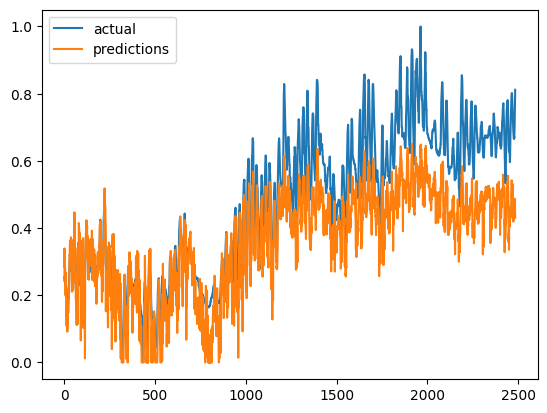

In [969]:
actul = test[win:,0]
plt.plot(actul,label="actual")
plt.plot(pred,label="predictions")
plt.legend()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [970]:
model_GRU = Sequential([
    GRU(10,activation="tanh",input_shape= (0,train.shape[-1])),
    Dense(1, activation="relu")
])
model_GRU.compile(optimizer = "adam",loss="mse", metrics=["mae"])


c:\Users\Hamad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [983]:
history1 = model_GRU.fit(train_x, validation_data=val_x, epochs=15,batch_size=500)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0198 - mae: 0.1144 - val_loss: 0.0719 - val_mae: 0.2482
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0179 - mae: 0.1090 - val_loss: 0.0609 - val_mae: 0.2273
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0158 - mae: 0.1026 - val_loss: 0.0520 - val_mae: 0.2092
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0138 - mae: 0.0959 - val_loss: 0.0449 - val_mae: 0.1938
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0120 - mae: 0.0892 - val_loss: 0.0386 - val_mae: 0.1792
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0103 - mae: 0.0824 - val_loss: 0.0329 - val_mae: 0.1647
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0086 - mae: 0.0756 - val_loss: 0.0275 - val_mae: 0.1497
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0071 - mae: 0.0686 - val_loss: 0.0224 - val_mae: 0.1341
Epoch 9/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [984]:
loss, acc = model_GRU.evaluate(test_x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - mae: 0.0294  


In [985]:
pred1 = model_GRU.predict(test_x)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [986]:
actul = test[win:,0]
mae = mean_absolute_error(actul,pred1)
mse = mean_squared_error(actul,pred1)
mape = mean_absolute_percentage_error(actul,pred1)
rmse = root_mean_squared_error(actul,pred1)

print("MSE ", mse)
print("mae ", mae)
print("mape ", mape)
print("rmse ", rmse)



MSE  0.0034774919157605755
mae  0.04598980727325404
mape  43903194954.71662
rmse  0.058970262978560437


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

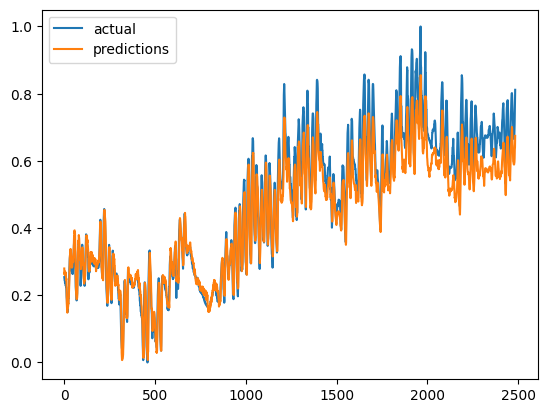

In [987]:
actul = test[win:,0]
plt.plot(actul,label="actual")
plt.plot(pred1,label="predictions")
plt.legend()

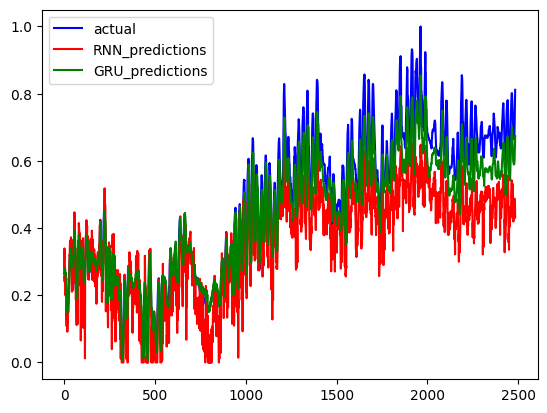

In [988]:
actul = test[win:,0]
plt.plot(actul,label="actual", color="blue")
plt.plot(pred,label="RNN_predictions", color = "Red")
plt.plot(pred1,label="GRU_predictions", color = "green")

plt.legend()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?


i did choose them to prepare the data for the model, it's mostly a cleaning techniques



2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.

i did a feature engineering to extract more information form the data.


3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?

i wanted to make it multi layer architecture. but i couldn't beacause the model will preform poorly. 


4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

i tried a lot, then i figured out that , these batch_size and epocs are best for me.


5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?


i did chose MSE and the reason that i removed the outlires, so it's perfict for me.


6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?


Batch size, complixisty of the model, so i removed the extra layers.


7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?


no it's donig a good jop.


8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.



if i have the time , i would want to do hyper tunning.

### Answer Here: